# Thư viện và các function cần thiết

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl

import map
import astart

In [10]:
# Vẽ kết quả
palette = mpl.cm.inferno.resampled(5).colors
labels = ["0: passage", "1: wall", "2: start", "3: destinatiom", "4: path"]
def show(arr):
    plt.figure(figsize=(9, 9))
    im = plt.imshow(palette[arr])
    # create a legend on the side
    patches = [mpatches.Patch(color=c, label=l) for c, l in zip(palette, labels)]
    plt.legend(handles=patches, bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0)
    plt.show()

# Khởi tạo bản đồ cho bài toán tìm đường

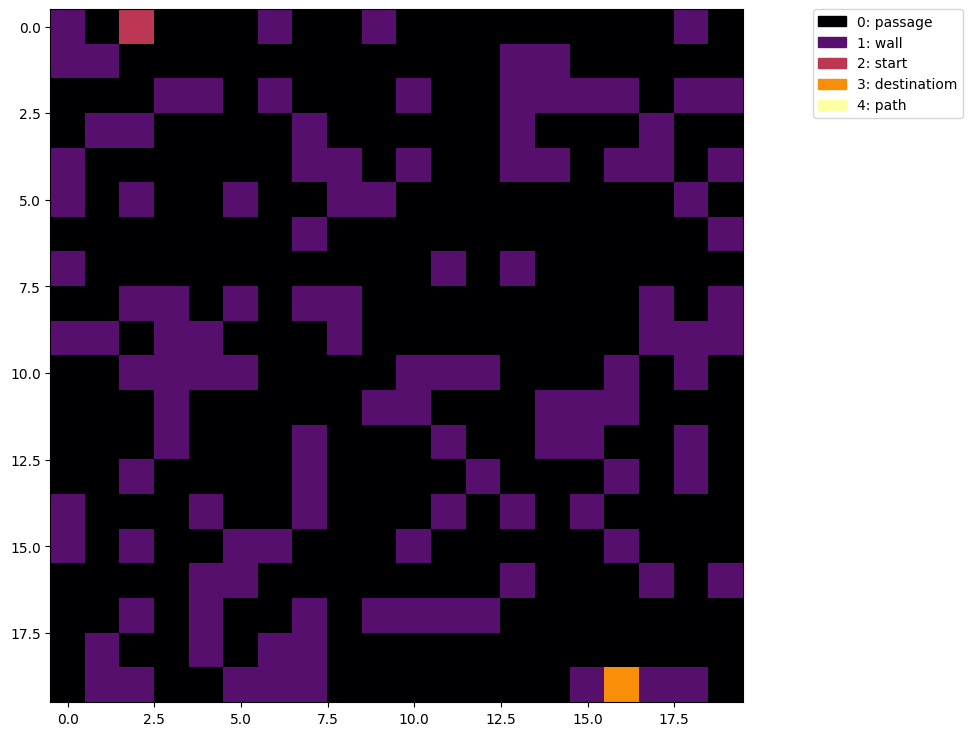

In [12]:
# Tạo map kích thước 20x20 tỉ lệ vật cản 30%
map1 = map.Map(20, 20)
map1.CreateWall(0.3)
show(map1.grid)

# Tìm đường bằng giải thuật A*

In [13]:
astart1 = astart.AStart(map1, 4)
astart1.Search()

The destination cell is found


The Path is 
-> (2, 0) -> (2, 1) -> (3, 1) -> (4, 1) -> (5, 1) -> (5, 2) -> (5, 3) -> (5, 4) -> (6, 4) -> (6, 5) -> (6, 6) -> (6, 7) -> (6, 8) -> (6, 9) -> (6, 10) -> (7, 10) -> (7, 11) -> (8, 11) -> (8, 12) -> (8, 13) -> (8, 14) -> (8, 15) -> (8, 16) -> (8, 17) -> (8, 18) -> (9, 18) -> (10, 18) -> (11, 18) -> (12, 18) -> (13, 18) -> (14, 18) -> (15, 18) -> (16, 18) -> (16, 19) 


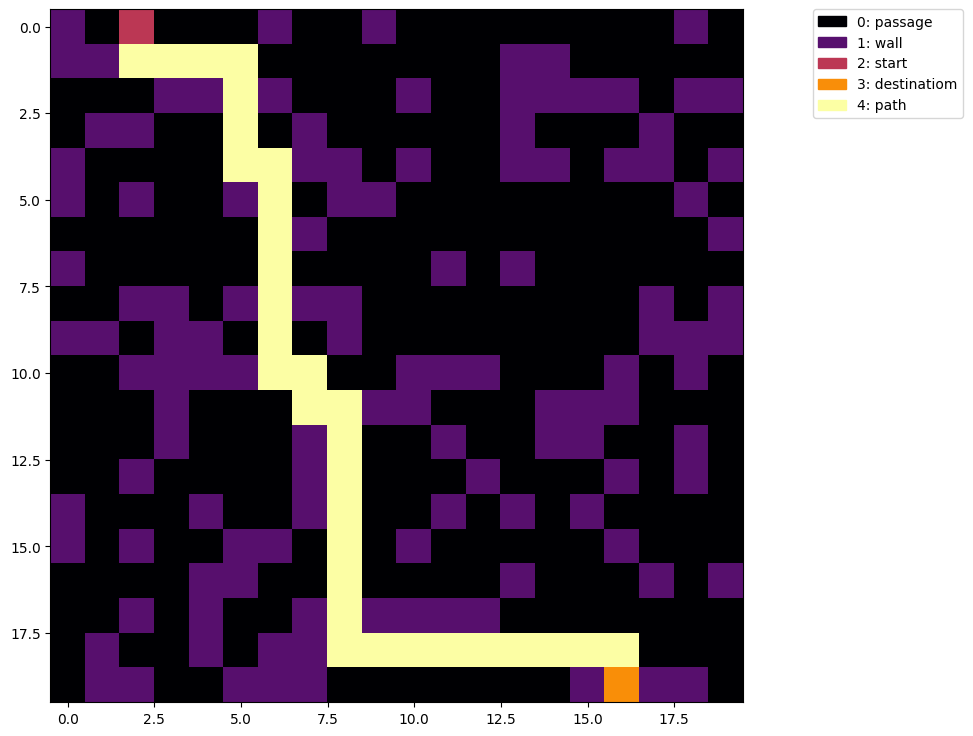

In [14]:
astart1.PrintPath()
astart1.UpdateGrid()
show(map1.grid)